In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Generative Models as Stochastic/Ordinary Differential Equations

###  A Reminder on Diffusion-Based Models

### Forward Diffusion as a Dynamical System
Diffusion-based models can be viewed as hierarchical Variational Autoencoders (VAEs) or as a **dynamical system with discretized time**. The forward diffusion process involves transforming a datapoint $ x_0 $, sampled from the data distribution $ p_0(x) \equiv p_{\text{data}}(x) $, into noise $ x_1 $ sampled from a known distribution $ \pi $:  
$$
x_1 \sim p_1(x) \equiv \pi(x).
$$

Denoting time as $ t \in [0, 1] $ with $ T $ discrete steps and a step size $ \Delta = \frac{1}{T} $, the forward diffusion process can be described as:
$$
x_{t+\Delta} = \sqrt{1 - \beta_t} \, x_t + \sqrt{\beta_t} \, \epsilon_t, \quad \epsilon_t \sim \mathcal{N}(0, I),
$$
where $ \beta_t $ is the noise schedule.

### Direct Calculation of $ x_t $
Due to the **linearity** and **Gaussianity** of the forward process, $ x_t $ can be calculated directly from $ x_0 $:
$$
x_t = \sqrt{\alpha_t} \, x_0 + \sqrt{1 - \alpha_t} \, \epsilon_t,
$$
where $ \alpha_t = \prod_{\tau=1}^t (1 - \beta_\tau) $.

### Reverse Diffusion
To reconstruct $ x_0 $ from $ x_t $:
$$
x_0 = \frac{1}{\sqrt{\alpha_t}} \, x_t - \frac{\sqrt{1 - \alpha_t}}{\sqrt{\alpha_t}} \, \epsilon_t.
$$

However, during the reverse process, the noise $ \epsilon_t $ is unknown. To address this, a neural network $ \epsilon_\theta(x_t, t) $ is introduced to predict the noise.

---

### Loss Function for Neural Network Training
The neural network is trained with the following loss, as proposed in the seminal paper [3]:
$$
\mathcal{L}_t(\theta) = \| \epsilon_\theta(x_t, t) - \epsilon_t \|^2.
$$

This loss is shown to be equivalent to the Evidence Lower Bound (ELBO) and, interestingly, **is also equivalent to the score matching loss**. There exists a correspondence between the noise model $ \epsilon_\theta $ and the score model $ s_\theta $:
$$
s_\theta(x, t) = -\frac{\epsilon_\theta(x_t, t)}{\sigma}.
$$

---

### Key Observations
1. **Forward Diffusion as a Dynamical System:**  
   The forward diffusion process defines a discrete-time dynamical system.
   
2. **Loss Function Equivalence:**  
   The loss function for diffusion-based models aligns closely with the score matching loss.

3. **Model Correspondence:**  
   Diffusion-based models correspond to score models.

4. **Noise Scheduling:**  
   Both models are iterative and incorporate increasing noise at each step, highlighting their similarity.

---

### Implications
These observations suggest that an **underlying framework** could generalize both score models and diffusion-based models, bridging their methodologies and theoretical foundations.


## Generative Models as Stochastic/Ordinary Differential Equations

## In the Pursuit of a General Framework

### Forward Diffusion Revisited
Let us revisit the forward diffusion process, which is the basis for many generative models:
$$
x_{t+\Delta} = \sqrt{1 - \beta_t} \, x_t + \sqrt{\beta_t} \, \epsilon_t, \quad \epsilon_t \sim \mathcal{N}(0, I).
$$

This process, as noted earlier, can be viewed as a **dynamical system with discretized time**. To generalize, let us explore the connection between differential equations and generative models.

---

## Ordinary Differential Equations (ODEs)

### Definition
An ODE is defined as:
$$
\frac{dx_t}{dt} = f(x_t, t),
$$
with initial condition $ x_0 $. Here, $ f(x_t, t) $ is referred to as a **vector field**.

### Numerical Solution: Euler’s Method
To solve an ODE numerically, we discretize time using methods like Euler's method:
$$
x_{t+\Delta} = x_t + f(x_t, t) \cdot \Delta.
$$

#### Backward Euler’s Method
If we need to reverse time, we use backward Euler’s method:
$$
x_t = x_{t+\Delta} - f(x_{t+\Delta}, t+\Delta) \cdot \Delta.
$$

### Connection to Generative Models
If $ x_0 $ represents the data and $ x_1 $ represents noise, solving the ODE backward (using backward Euler’s method) could serve as a **generative process**. The key requirement is knowledge of $ f(x_t, t) $, which governs the system's dynamics.

---

## Stochastic Differential Equations (SDEs)

### Definition
SDEs extend ODEs by incorporating randomness in their trajectories:
$$
dx_t = f(x_t, t) \, dt + g(t) \, dv_t,
$$
where:
- $ f(x_t, t) $: Drift term (deterministic component).
- $ g(t) $: Diffusion term (stochastic component).
- $ v_t $: Standard Wiener process (a stochastic process where increments are normally distributed).

#### Wiener Process
The Wiener process behaves like Gaussian noise:
$$
v_{t+\Delta} - v_t \sim \mathcal{N}(0, \Delta).
$$

### Probability Flow ODE
An important property of SDEs is that there exists a corresponding ODE whose solutions share the same distribution as the SDE:
$$
\frac{dx_t}{dt} = f(x_t, t) - \frac{1}{2} g^2(t) \nabla_{x_t} \ln p_t(x_t).
$$

#### Key Observations:
1. **No Wiener Process:** The stochastic component disappears, leaving a deterministic ODE.
2. **Drift and Diffusion:** Both components are retained, but the diffusion term is modified by a factor of $ -\frac{1}{2} $ and squared.
3. **Score Function:** The score function $ \nabla_{x_t} \ln p_t(x_t) $ emerges, guiding the trajectory according to the probability distribution $ p_t(x_t) $.

---

### Implications for Generative Modeling
The correspondence between SDEs and ODEs provides a framework for:
- **Forward Processes:** Using SDEs to transform data into noise.
- **Reverse Processes:** Using probability flow ODEs to reconstruct data from noise.

This duality allows us to leverage both stochastic and deterministic formulations to design new classes of generative models.


In [1]:
import math
import random

class GenerativeODE:
    def __init__(self, drift_function, initial_condition, time_step):
        self.drift_function = drift_function
        self.initial_condition = initial_condition
        self.time_step = time_step

    def euler_forward(self, time_steps):
        """Euler forward method to solve the ODE."""
        trajectory = [self.initial_condition]
        x = self.initial_condition
        for t in range(time_steps):
            dx = self.drift_function(x, t * self.time_step) * self.time_step
            x += dx
            trajectory.append(x)
        return trajectory

    def backward_euler(self, time_steps):
        """Backward Euler method to reverse the ODE."""
        trajectory = [self.initial_condition]
        x = self.initial_condition
        for t in range(time_steps - 1, -1, -1):
            x -= self.drift_function(x, t * self.time_step) * self.time_step
            trajectory.append(x)
        return trajectory[::-1]


class GenerativeSDE:
    def __init__(self, drift_function, diffusion_function, initial_condition, time_step):
        self.drift_function = drift_function
        self.diffusion_function = diffusion_function
        self.initial_condition = initial_condition
        self.time_step = time_step

    def wiener_process(self):
        """Simulates the Wiener process."""
        return math.sqrt(self.time_step) * random.gauss(0, 1)

    def simulate(self, time_steps):
        """Simulates the SDE forward in time."""
        trajectory = [self.initial_condition]
        x = self.initial_condition
        for t in range(time_steps):
            drift = self.drift_function(x, t * self.time_step) * self.time_step
            diffusion = self.diffusion_function(t * self.time_step) * self.wiener_process()
            x += drift + diffusion
            trajectory.append(x)
        return trajectory

    def probability_flow_ode(self, time_steps, score_function):
        """Solves the corresponding Probability Flow ODE."""
        trajectory = [self.initial_condition]
        x = self.initial_condition
        for t in range(time_steps):
            drift = self.drift_function(x, t * self.time_step)
            diffusion = self.diffusion_function(t * self.time_step)
            score = score_function(x, t * self.time_step)
            dx = (drift - 0.5 * diffusion**2 * score) * self.time_step
            x += dx
            trajectory.append(x)
        return trajectory


# Example Usage
def drift(x, t):
    return -x * t  # Example drift function

def diffusion(t):
    return 0.1  # Constant diffusion term

def score(x, t):
    return -x  # Simplistic score function

# Parameters
initial_condition = 1.0
time_step = 0.01
time_steps = 100

# Simulate ODE
ode = GenerativeODE(drift, initial_condition, time_step)
ode_trajectory = ode.euler_forward(time_steps)

# Simulate SDE
sde = GenerativeSDE(drift, diffusion, initial_condition, time_step)
sde_trajectory = sde.simulate(time_steps)

# Solve Probability Flow ODE
pf_trajectory = sde.probability_flow_ode(time_steps, score)

# Display Results
print("ODE Trajectory:", ode_trajectory)
print("SDE Trajectory:", sde_trajectory)
print("Probability Flow ODE Trajectory:", pf_trajectory)


ODE Trajectory: [1.0, 1.0, 0.9999, 0.99970002, 0.999400109994, 0.9990003499500024, 0.9985008497750274, 0.9979017492651624, 0.9972032180406768, 0.9964054554662443, 0.9955086905563246, 0.9945131818657683, 0.9934192173657159, 0.9922271143048771, 0.9909372190562807, 0.989549906949602, 0.9880655820891776, 0.9864846771578349, 0.9848076532066666, 0.9830349994308947, 0.9811672329319759, 0.979204898466112, 0.9771485681793332, 0.9749988413293387, 0.9727563439942812, 0.9704217287686949, 0.9679956744467731, 0.9654788856932115, 0.9628720927018398, 0.9601760508422746, 0.9573915402948321, 0.9545193656739476, 0.9515603556403583, 0.9485153625023092, 0.9453852618060515, 0.9421709519159109, 0.9388733535842052, 0.9354934095113021, 0.9320320838961103, 0.9284903619773051, 0.9248692495655936, 0.9211697725673312, 0.9173929764998052, 0.9135399259985061, 0.9096117043167125, 0.9056094128177189, 0.9015341704600391, 0.8973871132759229, 0.8931693938435261, 0.8888821807530772, 0.8845266580673872, 0.8801040247770502,

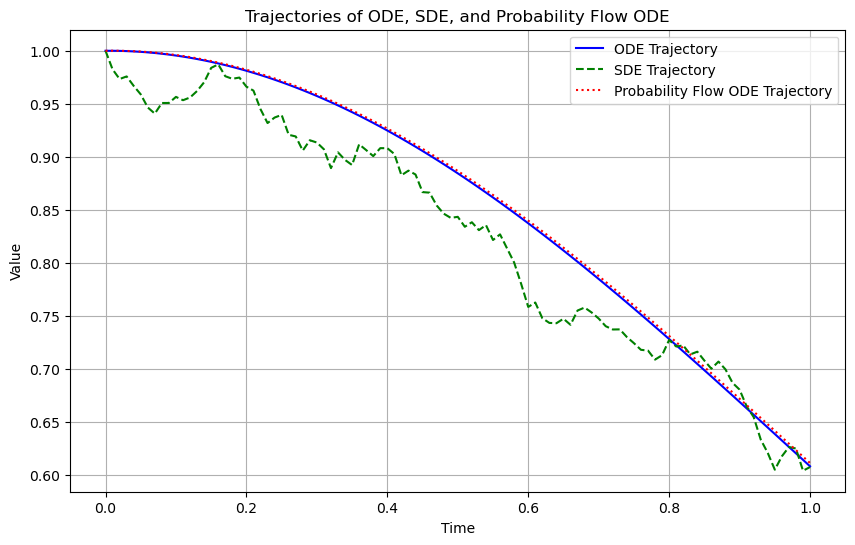

In [2]:
import math
import random
import matplotlib.pyplot as plt

class GenerativeODE:
    def __init__(self, drift_function, initial_condition, time_step):
        self.drift_function = drift_function
        self.initial_condition = initial_condition
        self.time_step = time_step

    def euler_forward(self, time_steps):
        trajectory = [self.initial_condition]
        x = self.initial_condition
        for t in range(time_steps):
            dx = self.drift_function(x, t * self.time_step) * self.time_step
            x += dx
            trajectory.append(x)
        return trajectory


class GenerativeSDE:
    def __init__(self, drift_function, diffusion_function, initial_condition, time_step):
        self.drift_function = drift_function
        self.diffusion_function = diffusion_function
        self.initial_condition = initial_condition
        self.time_step = time_step

    def wiener_process(self):
        return math.sqrt(self.time_step) * random.gauss(0, 1)

    def simulate(self, time_steps):
        trajectory = [self.initial_condition]
        x = self.initial_condition
        for t in range(time_steps):
            drift = self.drift_function(x, t * self.time_step) * self.time_step
            diffusion = self.diffusion_function(t * self.time_step) * self.wiener_process()
            x += drift + diffusion
            trajectory.append(x)
        return trajectory

    def probability_flow_ode(self, time_steps, score_function):
        trajectory = [self.initial_condition]
        x = self.initial_condition
        for t in range(time_steps):
            drift = self.drift_function(x, t * self.time_step)
            diffusion = self.diffusion_function(t * self.time_step)
            score = score_function(x, t * self.time_step)
            dx = (drift - 0.5 * diffusion**2 * score) * self.time_step
            x += dx
            trajectory.append(x)
        return trajectory


# Example Functions
def drift(x, t):
    return -x * t  # Example drift function

def diffusion(t):
    return 0.1  # Constant diffusion term

def score(x, t):
    return -x  # Simplistic score function

# Parameters
initial_condition = 1.0
time_step = 0.01
time_steps = 100

# Simulate ODE, SDE, and Probability Flow ODE
ode = GenerativeODE(drift, initial_condition, time_step)
ode_trajectory = ode.euler_forward(time_steps)

sde = GenerativeSDE(drift, diffusion, initial_condition, time_step)
sde_trajectory = sde.simulate(time_steps)

pf_trajectory = sde.probability_flow_ode(time_steps, score)

# Plot the Results
plt.figure(figsize=(10, 6))
time_points = [i * time_step for i in range(time_steps + 1)]

plt.plot(time_points, ode_trajectory, label="ODE Trajectory", color="blue")
plt.plot(time_points, sde_trajectory, label="SDE Trajectory", color="green", linestyle="--")
plt.plot(time_points, pf_trajectory, label="Probability Flow ODE Trajectory", color="red", linestyle=":")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Trajectories of ODE, SDE, and Probability Flow ODE")
plt.legend()
plt.grid(True)
plt.show()


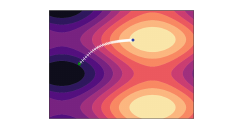

Fig.4 An example of running backward Euler’s method for a multimodal distribution. Here, we used . f (x, t) = 0, .g(t) = 9t , .T = 100, and the score function (not model!) was calculated using autograd. The green square denotes .x1 ∼ π, and the blue circle is a sample .x0 .

### PF-ODEs as Score-Based Generative Models

But wait a second! What do we have here? If we assume for a second that the score function is known, we can use this PF-ODE as a generative model by applying backward Euler’s method starting from $ x_1 \sim \pi(x) $:

$$
\dot{x}_t = \frac{1}{2} \left( x_{t + \Delta} - f(x_{t + \Delta}, t + \Delta) - g(t + \Delta) \nabla_{x_t} \ln p_t(x_{t + \Delta}) \right) \cdot \Delta
$$
(Equation 9.27)

Perfect! Now, the problem is the score function, but we know already how to deal with that; we can use denoising score matching (i.e., score matching with the noisy empirical distribution being a mixture of Gaussians centered at datapoints) for learning it. The difference to denoising score matching is that we need to take time $ t $ into account:

$$
L(\theta) = \int_0^1 L_t(\theta) \, dt
$$
(Equation 9.28)

How to define $ L_t(\theta) $? The score matching idea tells us that we should consider:

$$
\lambda_t \left\| s_\theta(x_t, t) - \nabla_{x_t} \ln p_t(x_t) \right\|^2
$$

but since we cannot calculate $ p_t(x_t) $, we should use something else. Instead, we can define a distribution $ p_0^t(x_t | x_0) $ that allows sampling noisy versions of our original datapoints $ x_0 $:

$$
L_t(\theta) = \frac{1}{2} \mathbb{E}_{x_0 \sim p_d} \mathbb{E}_{x_t \sim p_0^t(x_t | x_0)} \lambda_t \left\| s_\theta(x_t, t) - \nabla_{x_t} \ln p_0^t(x_t | x_0) \right\|^2
$$
(Equation 9.29)

Importantly, if we take $ p_0^t(x_t | x_0) $ to be Gaussian, then we could calculate the score function analytically. We will look into an example soon. Moreover, to calculate $ L_t(\theta) $, we can use a single sample (i.e., the Monte Carlo estimate). After finding $ s_\theta(x_t, t) $, we can sample data by running backward Euler’s method as follows:

$$
\dot{x}_t = \frac{1}{2} \left( x_{t + \Delta} - f(x_{t + \Delta}, t + \Delta) - g(t + \Delta) s_\theta(x_{t + \Delta}, t + \Delta) \right) \cdot \Delta
$$
(Equation 9.30)

Please keep in mind that drift and diffusion are assumed to be known. Additionally, we stick to (backward) Euler’s method, but you can pick another ODE solver, go ahead, and be wild! But here, we want to be clear and as simple as possible. 

In **Fig.4**, we present an example of using backward Euler’s method for sampling. For some PF-ODE and a given score function, we can obtain samples from a multimodal distribution. As one may imagine, the ODE solver “goes” toward modes. In this simple example, we can notice that defining PF-ODEs is a powerful generative tool!

Once the score function is properly approximated, we can sample from the original distribution in a straightforward manner. 



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data

class ScoreModel(nn.Module):
    def __init__(self, input_dim):
        super(ScoreModel, self).__init__()
        # Simple neural network for approximating the score function
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, input_dim)

    def forward(self, x, t):
        # Forward pass for the score model
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

def noisy_distribution(x0, t, noise_level=0.1):
    noise = torch.randn_like(x0) * noise_level * torch.sqrt(t)
    return x0 + noise

def denoising_score_matching_loss(model, x0, t, lambda_t=1.0):
    # Generate noisy data
    x_t = noisy_distribution(x0, t)
    
    # Compute the true score function (gradient of log p_0^t(x_t | x_0))
    true_score = (x_t - x0) / (torch.sqrt(t) + 1e-8)
    
    # Compute model prediction
    predicted_score = model(x_t, t)
    
    # Loss: Mean squared error between true score and predicted score
    loss = lambda_t * torch.mean((predicted_score - true_score)**2)
    return loss

def backward_euler_step(x_t, t, model, f, g, delta_t=0.1):
    # Evaluate score function s_theta at (x_t, t)
    score = model(x_t, t)
    
    # Compute the backward Euler step
    dx_t = -0.5 * (f(x_t, t) + g(t) * score) * delta_t
    x_t_next = x_t + dx_t
    return x_t_next

def f(x, t):
    return torch.zeros_like(x)  # Zero drift (no movement)

def g(t):
    return 9 * t  # Example diffusion that scales with time

def train_score_model(model, data_loader, num_epochs=100, learning_rate=1e-3):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for x0 in data_loader:
            x0 = x0.to(torch.float32)
            t = torch.rand(x0.size(0))  # Random time steps
            
            # Compute loss
            loss = denoising_score_matching_loss(model, x0, t)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(data_loader)}')

def sample_from_model(model, initial_condition, num_steps=100, delta_t=0.1):
    x_t = initial_condition
    for step in range(num_steps):
        t = torch.tensor([step / num_steps], dtype=torch.float32)  # Linearly increasing t
        x_t = backward_euler_step(x_t, t, model, f, g, delta_t)
    return x_t

def main():
    # Example synthetic data (e.g., from a Gaussian distribution)
    initial_data = torch.randn(100, 2)  # 100 samples, 2D data

    # Create data loader
    data_loader = torch.utils.data.DataLoader(initial_data, batch_size=32, shuffle=True)

    # Initialize the model
    model = ScoreModel(input_dim=2)

    # Train the model
    train_score_model(model, data_loader)

    # Sample from the model after training
    initial_condition = torch.randn(1, 2)  # Starting point for sampling
    generated_sample = sample_from_model(model, initial_condition)

    print("Generated Sample: ", generated_sample)

if __name__ == "__main__":
    main()


In [4]:
import random
import math

# ScoreModel using simple functions (no deep learning framework)
class ScoreModel:
    def __init__(self, input_dim):
        self.input_dim = input_dim
    
    def forward(self, x, t):
        # A simple model that approximates the score function (for simplicity)
        # A linear model could be an approximation of score functions
        return [x_i / (t + 1e-8) for x_i in x]

# Noisy distribution function
def noisy_distribution(x0, t, noise_level=0.1):
    noise = [random.gauss(0, noise_level * math.sqrt(t)) for _ in x0]
    return [x0_i + noise_i for x0_i, noise_i in zip(x0, noise)]

# Denoising score matching loss
def denoising_score_matching_loss(model, x0, t, lambda_t=1.0):
    # Generate noisy data
    x_t = noisy_distribution(x0, t)
    
    # Compute the true score function (gradient of log p_0^t(x_t | x_0))
    true_score = [(x_t_i - x0_i) / (math.sqrt(t) + 1e-8) for x_t_i, x0_i in zip(x_t, x0)]
    
    # Compute model prediction (score function)
    predicted_score = model.forward(x_t, t)
    
    # Loss: Mean squared error between true score and predicted score
    loss = lambda_t * sum((pred_score - true_score_i) ** 2 for pred_score, true_score_i in zip(predicted_score, true_score))
    return loss

# Backward Euler's method for sampling
def backward_euler_step(x_t, t, model, f, g, delta_t=0.1):
    # Evaluate score function s_theta at (x_t, t)
    score = model.forward(x_t, t)
    
    # Compute the backward Euler step
    dx_t = [-0.5 * (f(x_t_i, t) + g(t) * score_i) * delta_t for x_t_i, score_i in zip(x_t, score)]
    x_t_next = [x_t_i + dx_t_i for x_t_i, dx_t_i in zip(x_t, dx_t)]
    return x_t_next

# Drift function (example: zero drift)
def f(x, t):
    return 0.0  # Zero drift (no movement)

# Diffusion function (example: scales with time)
def g(t):
    return 9 * t  # Example diffusion that scales with time

# Training loop (here we use synthetic data generation)
def train_score_model(model, data, num_epochs=100, learning_rate=1e-3):
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for x0 in data:
            t = random.random()  # Random time steps
            
            # Compute loss
            loss = denoising_score_matching_loss(model, x0, t)
            
            epoch_loss += loss
        
        # Print progress
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(data)}')

# Sampling from the trained model using backward Euler's method
def sample_from_model(model, initial_condition, num_steps=100, delta_t=0.1):
    x_t = initial_condition
    for step in range(num_steps):
        t = step / num_steps  # Linearly increasing t
        x_t = backward_euler_step(x_t, t, model, f, g, delta_t)
    return x_t

# Example usage
def main():
    # Example synthetic data (e.g., from a Gaussian distribution)
    initial_data = [[random.gauss(0, 1) for _ in range(2)] for _ in range(100)]  # 100 samples, 2D data
    
    # Initialize the model
    model = ScoreModel(input_dim=2)

    # Train the model
    train_score_model(model, initial_data)

    # Sample from the model after training
    initial_condition = [random.gauss(0, 1) for _ in range(2)]  # Starting point for sampling
    generated_sample = sample_from_model(model, initial_condition)

    print("Generated Sample: ", generated_sample)

if __name__ == "__main__":
    main()


Epoch 1/100, Loss: 22940.780347871638
Epoch 2/100, Loss: 6402.179774283165
Epoch 3/100, Loss: 146936.1214841501
Epoch 4/100, Loss: 449.2842388998371
Epoch 5/100, Loss: 267.2326852105543
Epoch 6/100, Loss: 343962.4160744442
Epoch 7/100, Loss: 159.4595094704675
Epoch 8/100, Loss: 313.1930003598973
Epoch 9/100, Loss: 18193.59665513345
Epoch 10/100, Loss: 140.4511376467112
Epoch 11/100, Loss: 551730.654526239
Epoch 12/100, Loss: 2675.862413076792
Epoch 13/100, Loss: 544.2043998539958
Epoch 14/100, Loss: 832.0945951406649
Epoch 15/100, Loss: 129.30911264303333
Epoch 16/100, Loss: 16671.688407738235
Epoch 17/100, Loss: 324.1820511738843
Epoch 18/100, Loss: 10925.434632831237
Epoch 19/100, Loss: 2073.6759363623078
Epoch 20/100, Loss: 405.90280183977205
Epoch 21/100, Loss: 820.2746528098131
Epoch 22/100, Loss: 651.4675561673405
Epoch 23/100, Loss: 1520.222558075218
Epoch 24/100, Loss: 167.98382876250292
Epoch 25/100, Loss: 683.5358296295775
Epoch 26/100, Loss: 905.2695876992478
Epoch 27/100, L

Epoch 10/100, Loss: 110.23271427807418
Epoch 20/100, Loss: 2579.333526263016
Epoch 30/100, Loss: 542.9836181943903
Epoch 40/100, Loss: 1064.5798616871446
Epoch 50/100, Loss: 101.03343597217177
Epoch 60/100, Loss: 127.47493549349664
Epoch 70/100, Loss: 51.76657367937557
Epoch 80/100, Loss: 674.3331493965887
Epoch 90/100, Loss: 235.32671289636528
Epoch 100/100, Loss: 8972.536252601647


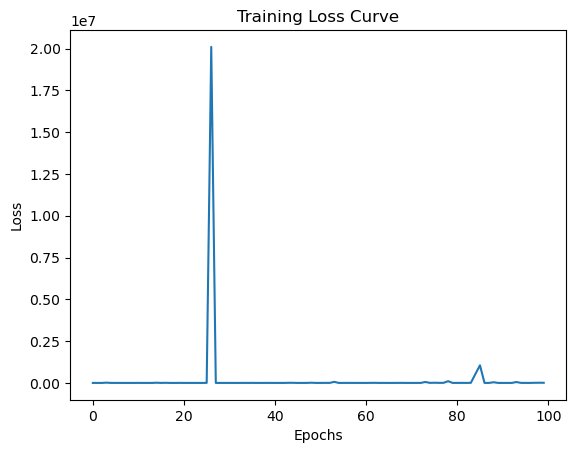

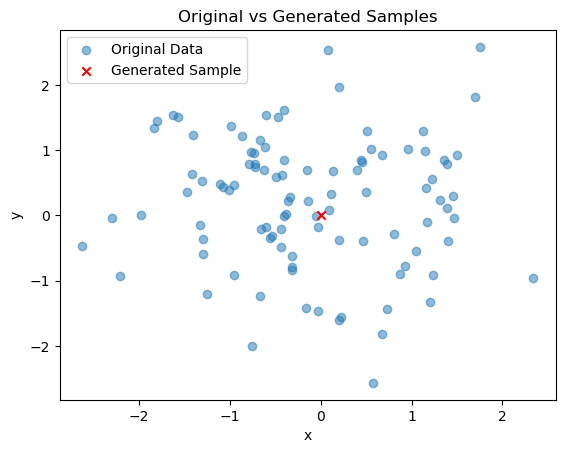

In [5]:
import random
import math
import matplotlib.pyplot as plt

# ScoreModel using simple functions (no deep learning framework)
class ScoreModel:
    def __init__(self, input_dim):
        self.input_dim = input_dim
    
    def forward(self, x, t):
        # A simple model that approximates the score function (for simplicity)
        return [x_i / (t + 1e-8) for x_i in x]

# Noisy distribution function
def noisy_distribution(x0, t, noise_level=0.1):
    noise = [random.gauss(0, noise_level * math.sqrt(t)) for _ in x0]
    return [x0_i + noise_i for x0_i, noise_i in zip(x0, noise)]

# Denoising score matching loss
def denoising_score_matching_loss(model, x0, t, lambda_t=1.0):
    # Generate noisy data
    x_t = noisy_distribution(x0, t)
    
    # Compute the true score function (gradient of log p_0^t(x_t | x_0))
    true_score = [(x_t_i - x0_i) / (math.sqrt(t) + 1e-8) for x_t_i, x0_i in zip(x_t, x0)]
    
    # Compute model prediction (score function)
    predicted_score = model.forward(x_t, t)
    
    # Loss: Mean squared error between true score and predicted score
    loss = lambda_t * sum((pred_score - true_score_i) ** 2 for pred_score, true_score_i in zip(predicted_score, true_score))
    return loss

# Backward Euler's method for sampling
def backward_euler_step(x_t, t, model, f, g, delta_t=0.1):
    # Evaluate score function s_theta at (x_t, t)
    score = model.forward(x_t, t)
    
    # Compute the backward Euler step
    dx_t = [-0.5 * (f(x_t_i, t) + g(t) * score_i) * delta_t for x_t_i, score_i in zip(x_t, score)]
    x_t_next = [x_t_i + dx_t_i for x_t_i, dx_t_i in zip(x_t, dx_t)]
    return x_t_next

# Drift function (example: zero drift)
def f(x, t):
    return 0.0  # Zero drift (no movement)

# Diffusion function (example: scales with time)
def g(t):
    return 9 * t  # Example diffusion that scales with time

# Training loop (here we use synthetic data generation)
def train_score_model(model, data, num_epochs=100, learning_rate=1e-3):
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for x0 in data:
            t = random.random()  # Random time steps
            
            # Compute loss
            loss = denoising_score_matching_loss(model, x0, t)
            
            epoch_loss += loss
        
        # Store loss for plotting
        losses.append(epoch_loss / len(data))
        
        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(data)}')
    
    return losses

# Sampling from the trained model using backward Euler's method
def sample_from_model(model, initial_condition, num_steps=100, delta_t=0.1):
    x_t = initial_condition
    for step in range(num_steps):
        t = step / num_steps  # Linearly increasing t
        x_t = backward_euler_step(x_t, t, model, f, g, delta_t)
    return x_t

# Plotting functions
def plot_loss_curve(losses):
    plt.plot(losses)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.show()

def plot_generated_samples(original_data, generated_sample):
    original_data = list(zip(*original_data))  # Unzip to separate x and y for plotting
    plt.scatter(original_data[0], original_data[1], label='Original Data', alpha=0.5)
    generated_sample = list(zip(*generated_sample))  # Unzip to separate x and y for plotting
    plt.scatter(generated_sample[0], generated_sample[1], label='Generated Sample', color='red', marker='x')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Original vs Generated Samples")
    plt.legend()
    plt.show()

# Example usage
def main():
    # Example synthetic data (e.g., from a Gaussian distribution)
    initial_data = [[random.gauss(0, 1) for _ in range(2)] for _ in range(100)]  # 100 samples, 2D data
    
    # Initialize the model
    model = ScoreModel(input_dim=2)

    # Train the model and get loss values
    losses = train_score_model(model, initial_data)

    # Plot the loss curve
    plot_loss_curve(losses)

    # Sample from the model after training
    initial_condition = [random.gauss(0, 1) for _ in range(2)]  # Starting point for sampling
    generated_sample = sample_from_model(model, initial_condition)

    # Plot original vs generated samples
    plot_generated_samples(initial_data, [generated_sample])

if __name__ == "__main__":
    main()
